### Prediction of TF-co-occurences for different cell lines (e.g. A375_enhancers.bed) and theire enhancer regions
e.g. Data example:
chr1	100503870	100506200	RP4-714D9.5,HIAT1

In [35]:
from tfcomb import CombObj
C = CombObj()


### Automated Pipline for market basket analyses for enhancer cell lines

In [36]:
from tfcomb import CombObj
genome_path="../testdaten/hg19_masked.fa"
motif_path="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt"
result_path="./results/"


def do_market_basket_analyses_for_cell_line(cell_line_name: str, rel_path: str ):
    '''
        Does market basket analyses for cell line with :cell_line_name and the rel_path: to the region data.
        Saves the data to name.pkl file.
        
        e.g.:
        rel_path: "../testdaten/enhancers/A375_enhancers.bed"
    '''
    print(f'Starting with tfbs-detection and market basket analyses for cell_line: {cell_line_name}, data path:{rel_path}.')
    comb = CombObj()
    comb.TFBS_from_motifs(regions= rel_path,
                   motifs=motif_path,
                   genome=genome_path,
                   threads=4)
    print(f'TFBS detection is done for cell_line: {cell_line_name}')
    print(f'Start market basket analyses for cell line: {cell_line_name}')
    comb.market_basket(threads=10)
    print(f'Finished market basket analyses for cell line: {cell_line_name}')
    print(f'Found rules: {len(comb.rules)}')
    comb.to_pickle(f'{result_path}{cell_line_name}_complete.pkl')
    print(f'Saved complete rules to {result_path}{cell_line_name}_complete.pkl')
    
    print(f'Find significat rules for cell line: {cell_line_name}')
    selected = comb.select_significant_rules(plot=False)
    print(f'Finished selection')
    print(f'count of selected rules: {len(selected.rules)}')
    
    selected.to_pickle(f'{result_path}{cell_line_name}_significant.pkl')
    print(f'Saved complete rules to {result_path}{cell_line_name}_significant.pkl')
    

#### This does read_in our enhancer region files for the different cell lines and then saves the tf_cooccurences for each into a .pkl file

In [ ]:
from os import listdir
from os.path import isfile, join

enhancer_path="../testdaten/enhancers/"
def read_in_file_names_of_folder(rel_path:str):
    return [f for f in listdir(rel_path) if isfile(join(rel_path, f))]

cell_line_names = read_in_file_names_of_folder(rel_path=enhancer_path)
for cell_line in cell_line_names:
    cell_line_name = cell_line.split('.')[0]
    print(cell_line)
    print(cell_line_name)
    do_market_basket_analyses_for_cell_line(cell_line_name=cell_line_name,
                                            rel_path=f"{enhancer_path}{cell_line}")

### Analyse: comparison between leucocyten: CD4+ T-Helferzellen und CD8+ T-Suppressorzellen, Caco-2_enhancers_significant (Darm Krebszellen)


In [37]:
A = CombObj().from_pickle(f"{result_path}CD4+_enhancers_significant.pkl")
A.prefix = "CD4+"

B = CombObj().from_pickle(f"{result_path}CD8+_enhancers_significant.pkl")
B.prefix = "CD8+"

A_c = CombObj().from_pickle(f"{result_path}CD4+_enhancers_complete.pkl")
A_c.prefix = "CD4+"

B_c = CombObj().from_pickle(f"{result_path}CD8+_enhancers_complete.pkl")
B_c.prefix = "CD8+"



C = CombObj().from_pickle(f"{result_path}Caco-2_enhancers_significant.pkl")
C.prefix = "Caco-2"

A.TFBS

[chr1	629797	629807	HOXB13	8.20849	+,
 chr1	629833	629857	ZNF354A	8.4683	+,
 chr1	629837	629855	AR	7.30549	+,
 chr1	629840	629857	NANOG	7.0645	+,
 chr1	629850	629865	HNF1A	10.56118	-,
 chr1	629890	629910	ZFP28	5.71774	-,
 chr1	629892	629916	ZNF354A	9.45852	-,
 chr1	629895	629915	IRF1	9.53844	+,
 chr1	629895	629915	IRF2	8.18772	+,
 chr1	629896	629916	ZNF394	8.13483	+,
 chr1	629899	629918	STAT2	6.21299	+,
 chr1	629915	629939	ZNF146	-4.6204	-,
 chr1	629947	629967	ZFP28	4.86899	-,
 chr1	629953	629962	NFATC2	8.50922	+,
 chr1	630253	630265	IRF9	5.77299	-,
 chr1	630261	630281	ZFP28	12.59151	-,
 chr1	630265	630285	IRF1	7.34013	+,
 chr1	630265	630285	IRF2	6.75591	+,
 chr1	630269	630288	STAT2	8.83473	+,
 chr1	630281	630296	HSF1	7.42147	-,
 chr1	630309	630321	IRF9	5.48634	-,
 chr1	976527	976546	ZNF667	8.41585	+,
 chr1	976527	976547	ZNF331	8.91419	-,
 chr1	976533	976544	NFKB1	6.96793	+,
 chr1	976533	976545	RELB	9.21119	-,
 chr1	976535	976549	KLF1	8.8191	-,
 chr1	976535	976549	KLF5	7.76978	-,
 chr1

In [38]:
A.rules[:10]


,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
SP1-SP2,SP1,SP2,2556,2408,2675,1.007096,67.263173
SP2-SP1,SP2,SP1,2556,2675,2408,1.007096,67.263173
SP2-SP3,SP2,SP3,2578,2675,2607,0.976226,65.651467
SP3-SP2,SP3,SP2,2578,2607,2675,0.976226,65.651467
SP3-SP1,SP3,SP1,2300,2607,2408,0.917971,54.188781
SP1-SP3,SP1,SP3,2300,2408,2607,0.917971,54.188781
KLF3-SP2,KLF3,SP2,2082,2206,2675,0.857070,51.028703
SP2-KLF3,SP2,KLF3,2082,2675,2206,0.857070,51.028703
PATZ1-SP2,PATZ1,SP2,2460,3163,2675,0.845714,48.246039
SP2-PATZ1,SP2,PATZ1,2460,2675,3163,0.845714,48.246039


In [ ]:
print(f"CD4+: {A}")
print(f"CD8+: {B}")
print(f"Caco-2: {C}")

print(f"CD4+_complete: {A_c}")
print(f"CD8+_complete: {B_c}")

In [ ]:
compare_obj = A_c.compare(B_c)

In [ ]:
compare_obj.rules

In [ ]:
compare_obj.plot_heatmap()

In [ ]:
selection = compare_obj.select_rules()


In [ ]:
selection.rules

In [ ]:
selection.plot_network()

In [ ]:
selection.rules[-10:]

In [ ]:
test = A.get_pair_locations("SP1","SP2")
test

In [4]:
A = CombObj().from_pickle(f"{result_path}CD4+_enhancers_significant.pkl")
A.prefix = "CD4+"

B = CombObj().from_pickle(f"{result_path}CD8+_enhancers_significant.pkl")
B.prefix = "CD8+"

compare_obj = A.compare(B)

INFO: Calculating foldchange for contrast: CD4+ / CD8+
INFO: The calculated log2fc's are found in the rules table (<DiffCombObj>.rules)


INFO: Selecting rules for contrast: ('CD4+', 'CD8+')
INFO: measure_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of rules using thresholds


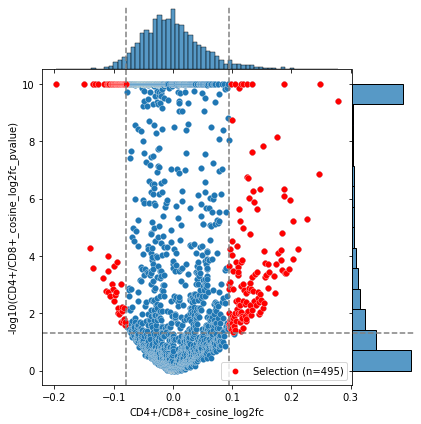

In [5]:
compare_obj.select_rules()

AttributeError: 'DataFrame' object has no attribute 'logger'

### Find bindings sites for TF in region with the binding sites of the Hocomoco File
Todo:Things to iterate
Use another motif file?
Use another genome file?

In [ ]:
C.TFBS_from_motifs(regions="../testdaten/enhancers/A375_enhancers.bed",
                   motifs="../testdaten/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../testdaten/hg19_masked.fa",
                   threads=4)


In [ ]:
C.TFBS[:10]

### Market Basket analyses for co-occurences:

In [ ]:
C.market_basket(threads=10)

In [ ]:
C.rules

In [ ]:
_ = C.plot_heatmap()

In [ ]:
_ = C.plot_bubble()

In [ ]:
selected = C.select_significant_rules()

In [ ]:
selected

In [ ]:
selected.rules

In [ ]:
top_rules_100 = C.select_top_rules(n=100)

In [ ]:
top_rules_100.rules

In [ ]:
top_rules_100.to_pickle("./results/A375_enhancers_selected_100.pkl")

In [ ]:
top_rules_100.plot_network()

In [ ]:
top_rules_100.plot_network(color_node_by="TF1", color_edge_by="zscore")

In [ ]:
top_rules_100.plot_network(engine="fdp")

In [ ]:
selected.plot_network()

In [ ]:
selected.rules

In [ ]:
selected.plot_network()